In [1]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import numpy
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.ensemble import VotingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from numpy import loadtxt


In [2]:
# load numpy array from csv file
# load array
X_train_SMOTE = loadtxt('X_train_SMOTE.csv', delimiter=',')
y_train_SMOTE = loadtxt('y_train_SMOTE.csv', delimiter=',')
y_pred_SMOTE = loadtxt('y_pred_SMOTE.csv', delimiter=',')
y_test = loadtxt('y_test.csv', delimiter=',')
X_test = pd.read_csv('X_test.csv', index_col = 0)
# print the array
#print(X_train_SMOTE,y_train_SMOTE)

In [3]:
#X_test_all = X_test.drop(['AgeGroup'], axis=1)
X_test

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,AgeGroup
5489,98.0,98.0,98.00,98.0,98.00,98.0,98.0,46,0,98.0,98.0,-4.80,19,Adult
2500,122.0,98.0,39.28,135.0,93.67,98.0,32.0,36,1,1.0,0.0,-0.02,24,Young
30561,68.0,96.0,98.00,160.0,90.00,62.0,15.0,53,1,98.0,98.0,0.00,21,Adult
1925,91.0,98.5,36.90,101.5,72.50,48.5,14.0,62,1,0.0,1.0,-93.26,41,Adult
32849,98.0,98.0,98.00,98.0,98.00,98.0,98.0,50,0,1.0,0.0,-6.05,31,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26145,127.0,94.5,38.70,86.0,70.00,60.0,5.0,58,1,0.0,1.0,-74.53,43,Adult
7717,97.0,94.0,98.00,147.0,98.00,72.0,21.0,60,0,98.0,98.0,-0.05,22,Adult
34119,76.0,100.0,36.50,88.0,80.00,77.0,17.0,60,0,98.0,98.0,-0.02,27,Adult
3206,77.0,100.0,98.00,169.0,110.33,98.0,14.0,61,0,1.0,0.0,-8.63,5,Adult


In [4]:
Counter(y_test)

Counter({0.0: 11829, 1.0: 175})

In [5]:
df_y_train = pd.DataFrame(y_train_SMOTE,columns = ['SepsisLabel'])


In [6]:
import numpy as np
import pandas as pd
  

# convert numpy array to dataframe
df_X_train = pd.DataFrame(X_train_SMOTE,columns =['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'Age', 'Gender',
       'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS'] )
print("\n dataframe_X_train_SMOTE: ")

df_X_train



 dataframe_X_train_SMOTE: 


,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,100.000000,98.500000,37.500000,110.000000,70.000000,51.000000,18.000000,61.0,1.0,0.000000,1.000000,-141.650000,35.0
1,101.000000,99.000000,36.100000,146.000000,121.000000,104.000000,20.000000,30.0,0.0,1.000000,0.000000,-7.810000,8.0
2,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,66.0,1.0,98.000000,98.000000,-2.940000,16.0
3,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,69.0,1.0,98.000000,98.000000,-2.890000,45.0
4,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,100.0,1.0,1.000000,0.000000,-180.740000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55149,89.216935,97.874193,37.048331,107.342742,73.845968,59.223389,16.108467,64.0,0.0,98.000000,98.000000,-0.971928,18.0
55150,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,75.0,1.0,0.126677,0.873323,-110.244767,1.0
55151,96.908068,96.266818,98.000000,128.275795,65.766818,45.150227,21.000000,31.0,1.0,98.000000,98.000000,-0.020000,10.0
55152,92.967422,99.266804,36.600000,113.382887,74.183299,59.000000,14.000000,68.0,1.0,1.000000,0.000000,-6.760000,35.0


In [7]:
%store df_X_train

Stored 'df_X_train' (DataFrame)


In [8]:
import numpy as np
bins= [15, 40, 65, np.inf]
# (15,40] (40,65] and 60+ 
labels = ['Young','Adult','OLD']
df_X_train['AgeGroup'] = pd.cut(df_X_train['Age'], bins=bins, labels=labels)



In [9]:
Young_index = df_X_train[df_X_train['AgeGroup'] == 'Young'].index

Adult_index = df_X_train[df_X_train['AgeGroup'] == 'Adult'].index

Old_index = df_X_train[df_X_train['AgeGroup'] == 'OLD'].index


In [10]:
X_Train_Young = df_X_train[df_X_train['AgeGroup'] == 'Young']
X_Train_Adult = df_X_train[df_X_train['AgeGroup'] == 'Adult']
X_Train_Old= df_X_train[df_X_train['AgeGroup'] == 'OLD']

In [11]:
y_train_Young = df_y_train.iloc[Young_index]
y_train_Adult = df_y_train.iloc[Adult_index]
y_train_Old = df_y_train.iloc[Old_index]

In [12]:
#functions to generate accuracy report
def evaluation_score (y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred) 
    print("Confusion Matrix \n", cm)
    print("Classification Report \n", classification_report(y_test,y_pred))

In [13]:
def specificity_score (y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    TN, FP, FN, TP = cm.ravel()
    specificity = TN / (TN+FP)
    return specificity

In [14]:
def Plotting(Plots_title, Acc, Pre, Sens, Spec):
    
    plot = plt.figure()
    axes = plot.add_axes([0,0,1,1])
    metrics = ['Accuracy',  'Precision', 'Sensitivity','Specificty']
    values = [Acc, Pre, Sens, Spec]
    barlist = axes.bar(metrics,values, width=0.5)
    barlist[0].set_color('royalblue')
    barlist[1].set_color('green')
    barlist[2].set_color('orange')
    barlist[3].set_color('yellow')
    axes.set_yticks(np.arange(0, 1.25, 0.5))
    axes.set_title(Plots_title)
    def autolabel(rects):
        for idx,rect in enumerate(barlist):
            height = rect.get_height()
            axes.text(rect.get_x() + rect.get_width()/2., 1*height,
                    round(values[idx],3),
                    ha='center', va='bottom', rotation=0)

    autolabel(barlist)
    plt.show()



In [15]:
import joblib
# load
rf_model_SMOTE = joblib.load("my_random_forest.joblib")

In [16]:
y_train_SMOTE


array([0., 0., 0., ..., 1., 1., 1.])

# Model training with only adult patients

## Test data set includes all the patients 

In [17]:

#Metrics packages
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score 
import warnings
from sklearn.metrics import precision_score, recall_score, make_scorer, accuracy_score

In [21]:
X_test_all = X_test.drop(['AgeGroup'], axis=1)
X_train_Adult = X_Train_Adult.drop(['AgeGroup'], axis=1)

<ipython-input-22-9d0d8a676ad0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model_SMOTE = rf_model_SMOTE.fit(X_train_Adult,y_train_Adult)


Confusion Matrix 
 [[11681   148]
 [   88    87]]
Classification Report 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     11829
         1.0       0.37      0.50      0.42       175

    accuracy                           0.98     12004
   macro avg       0.68      0.74      0.71     12004
weighted avg       0.98      0.98      0.98     12004



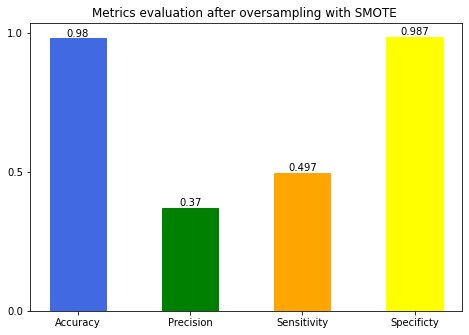

In [22]:
rf_model = RandomForestClassifier()
rf_model_SMOTE = rf_model_SMOTE.fit(X_train_Adult,y_train_Adult)
y_pred_SMOTE = rf_model_SMOTE.predict(X_test_all)
evaluation_score(y_test,y_pred_SMOTE)

cm_SMOTE=confusion_matrix(y_test,y_pred_SMOTE)
TN, FP, FN, TP = cm_SMOTE.ravel()
pd.crosstab(y_test, y_pred_SMOTE, rownames = ['Actual'], colnames =['Predicted'], margins = True)
Plotting("Metrics evaluation after oversampling with SMOTE ", accuracy_score(y_test,y_pred_SMOTE),precision_score(y_test,y_pred_SMOTE),recall_score(y_test,y_pred_SMOTE),specificity_score(y_test,y_pred_SMOTE)) 
#plt.savefig('rf_model_with_SMOTE_Trainedwithmale.png')

In [32]:
def fairness_metrics(sensitive_features):
    """Calculate fairness for subgroup of population"""
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    TN, FP, FN, TP = cm.ravel()
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    TNR = TN/(FP+TN) # True negative rate
    return np.array([ACC, PPV, TPR, TNR])  

In [33]:
bins= [15, 40, 65, np.inf]
# (15,40] (40,65] and 60+ 
labels = ['Young','Adult','OLD']
X_test_all['AgeGroup'] = pd.cut(X_test_all['Age'], bins=bins, labels=labels)
sensitive_features = X_test_all[['Age','Gender','AgeGroup']] 

In [34]:
sensitive_features['y_true'] =  y_test
sensitive_features['y_pred'] = y_pred_SMOTE

<ipython-input-34-277ca21f020f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_true'] =  y_test
<ipython-input-34-277ca21f020f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensitive_features['y_pred'] = y_pred_SMOTE


In [35]:
Young = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adult = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLD = fairness_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])

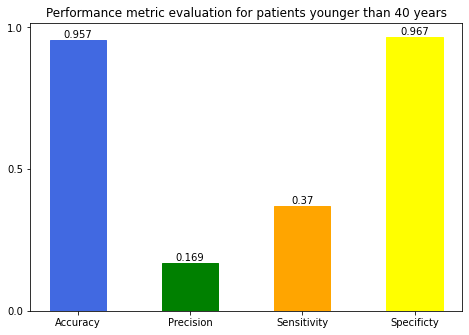

In [36]:
Plotting("Performance metric evaluation for patients younger than 40 years",Young[0],Young[1],Young[2],Young[3])
#plt.savefig('metrics for young patients.png')



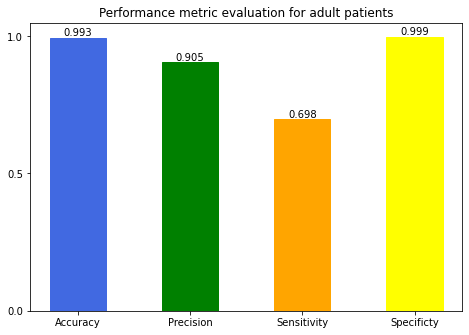

In [37]:
Plotting("Performance metric evaluation for adult patients",Adult[0],Adult[1],Adult[2],Adult[3])

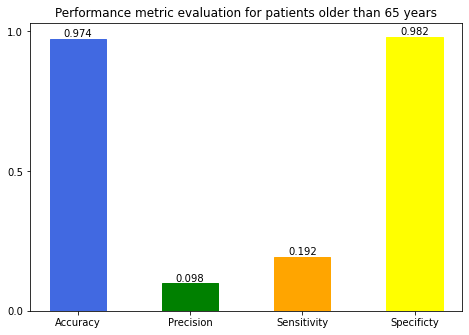

In [38]:
Plotting("Performance metric evaluation for patients older than 65 years",OLD[0],OLD[1],OLD[2],OLD[3])

In [39]:
def evaluation_metrics(sensitive_features):
    
    #Confusion Matrix
    cm=confusion_matrix(sensitive_features['y_true'],sensitive_features['y_pred'])
    print(cm)
    TN, FP, FN, TP = cm.ravel() 
    
    N = TP+FP+FN+TN #Total population
    ACC = (TP+TN)/N #Accuracy
    PPV = TP/(TP+FP) #Positive predictive value (Precison)
    TPR = TP/(TP+FN) # True positive rate
    FPR = FP/(FP+TN) # False positive rate
    TNR = TN/(FP + TN) # True negative rate
    FNR = FN /(FN +TP) # False negative rate
    FDR = 1 - PPV # False discovery rate
    df_metrics = [{'Acc': (TP+TN)/N, 'PPV': TP/(TP+FP), 'TPR' : TP/(TP+FN), 'FPR' : FP/(FP+TN), 'TNR' : TN/(FP + TN), 'FNR' : FN /(FN +TP), 'FDR' : 1 - PPV  }]
  
    return df_metrics

In [40]:
Youngs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Young'])
Adults = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='Adult'])
OLDs = evaluation_metrics(sensitive_features[sensitive_features.AgeGroup=='OLD'])
data_metrics_Youngs = pd.DataFrame(Youngs, index= ['Youngs'])
data_metrics_Adults = pd.DataFrame(Adults, index= ['Adults'])
data_metrics_Olds = pd.DataFrame(OLDs, index= ['Seniors'])
pd.concat([data_metrics_Youngs, data_metrics_Adults, data_metrics_Olds])

[[1445   49]
 [  17   10]]
[[5209    7]
 [  29   67]]
[[5027   92]
 [  42   10]]


,Acc,PPV,TPR,FPR,TNR,FNR,FDR
Youngs,0.956607,0.169492,0.370370,0.032798,0.967202,0.629630,0.830508
Adults,0.993223,0.905405,0.697917,0.001342,0.998658,0.302083,0.094595
Seniors,0.974086,0.098039,0.192308,0.017972,0.982028,0.807692,0.901961
